In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Step 1 - Data Loading
train_path = "../data/higgs/higgs_train.csv"
test_path  = "../data/higgs/higgs_test.csv"
df_train = pd.read_csv(train_path)
df_test  = pd.read_csv(test_path)

df_train.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138683,136.372,32.142,95.158,24.012,-999.000,-999.000,-999.000,2.650,24.012,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,4.585780,b
1,164939,123.147,73.967,73.065,1.951,-999.000,-999.000,-999.000,3.181,1.951,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,5.005938,b
2,103954,114.196,77.282,84.580,1.398,-999.000,-999.000,-999.000,2.808,1.398,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,4.747560,b
3,220374,113.938,37.713,78.068,73.541,1.506,83.664,0.344,2.062,2.179,...,2,45.739,-1.707,2.192,38.358,-0.202,-3.017,84.097,0.018636,s
4,272861,-999.000,82.024,55.707,15.350,-999.000,-999.000,-999.000,1.943,15.350,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,4.924326,b


In [3]:
# Step 2 - Data Overview
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)

print("\nTrain info:")
df_train.info()

print("\nTrain describe (numeric columns):")
df_train.describe().T.head(15)

Train shape: (175000, 33)
Test shape: (75000, 32)

Train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      175000 non-null  int64  
 1   DER_mass_MMC                 175000 non-null  float64
 2   DER_mass_transverse_met_lep  175000 non-null  float64
 3   DER_mass_vis                 175000 non-null  float64
 4   DER_pt_h                     175000 non-null  float64
 5   DER_deltaeta_jet_jet         175000 non-null  float64
 6   DER_mass_jet_jet             175000 non-null  float64
 7   DER_prodeta_jet_jet          175000 non-null  float64
 8   DER_deltar_tau_lep           175000 non-null  float64
 9   DER_pt_tot                   175000 non-null  float64
 10  DER_sum_pt                   175000 non-null  float64
 11  DER_pt_ratio_lep_tau         175000 non-null  float64


,count,mean,std,min,25%,50%,75%,max
EventId,175000.0,225110.493577,72145.054611,100000.000,162570.50000,225152.5000,287590.25000,349999.000
DER_mass_MMC,175000.0,-49.628612,407.218564,-999.000,77.94775,104.9340,130.58125,988.199
DER_mass_transverse_met_lep,175000.0,49.325133,35.357137,0.000,19.30600,46.6575,73.62800,594.287
DER_mass_vis,175000.0,81.233778,41.118403,6.329,59.33875,73.7080,92.23000,1329.913
DER_pt_h,175000.0,57.918801,63.731894,0.000,14.06075,38.5145,79.25675,2834.999
DER_deltaeta_jet_jet,175000.0,-708.004070,454.672731,-999.000,-999.00000,-999.0000,0.49600,8.503
DER_mass_jet_jet,175000.0,-600.483421,658.960711,-999.000,-999.00000,-999.0000,83.63325,4974.979
DER_prodeta_jet_jet,175000.0,-708.941271,453.211529,-999.000,-999.00000,-999.0000,-4.56475,16.648
DER_deltar_tau_lep,175000.0,2.372299,0.783185,0.208,1.80900,2.4890,2.96000,5.655
DER_pt_tot,175000.0,18.925814,22.683781,0.000,2.84100,12.2275,27.56300,2834.999


In [7]:
# Step 3 - Check missing values
missing_neg999 = (df_train == -999.0).sum().sort_values(ascending=False)

print("Missing (-999) values per column:")
print(missing_neg999[missing_neg999 > 0])

print("\nTotal -999 count:", missing_neg999.sum())

# -999 = NA
feature_cols = df_test.columns

df_train[feature_cols] = df_train[feature_cols].replace(-999.0, np.nan)
df_test[feature_cols]  = df_test[feature_cols].replace(-999.0, np.nan)

print("Remaining -999 count in train:", (df_train[feature_cols] == -999.0).sum().sum())
print("Remaining -999 count in test:",  (df_test[feature_cols] == -999.0).sum().sum())

Missing (-999) values per column:
Series([], dtype: int64)

Total -999 count: 0
Remaining -999 count in train: 0
Remaining -999 count in test: 0


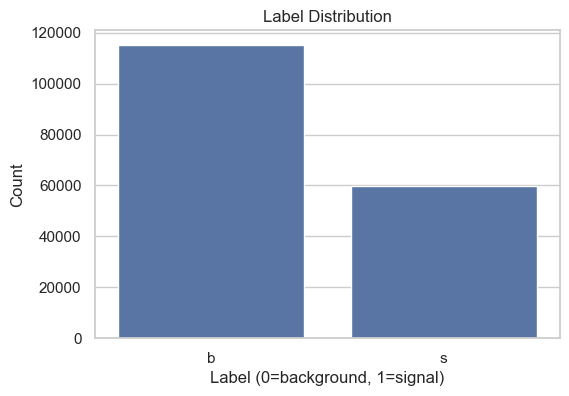

Target value counts:
Label
b    115214
s     59786
Name: count, dtype: int64


In [8]:
# Step 4 - Target Variable Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df_train, x='Label')
plt.title("Label Distribution")
plt.xlabel("Label (0=background, 1=signal)")
plt.ylabel("Count")
plt.show()

print("Target value counts:")
print(df_train['Label'].value_counts())

Number of numeric columns: 31


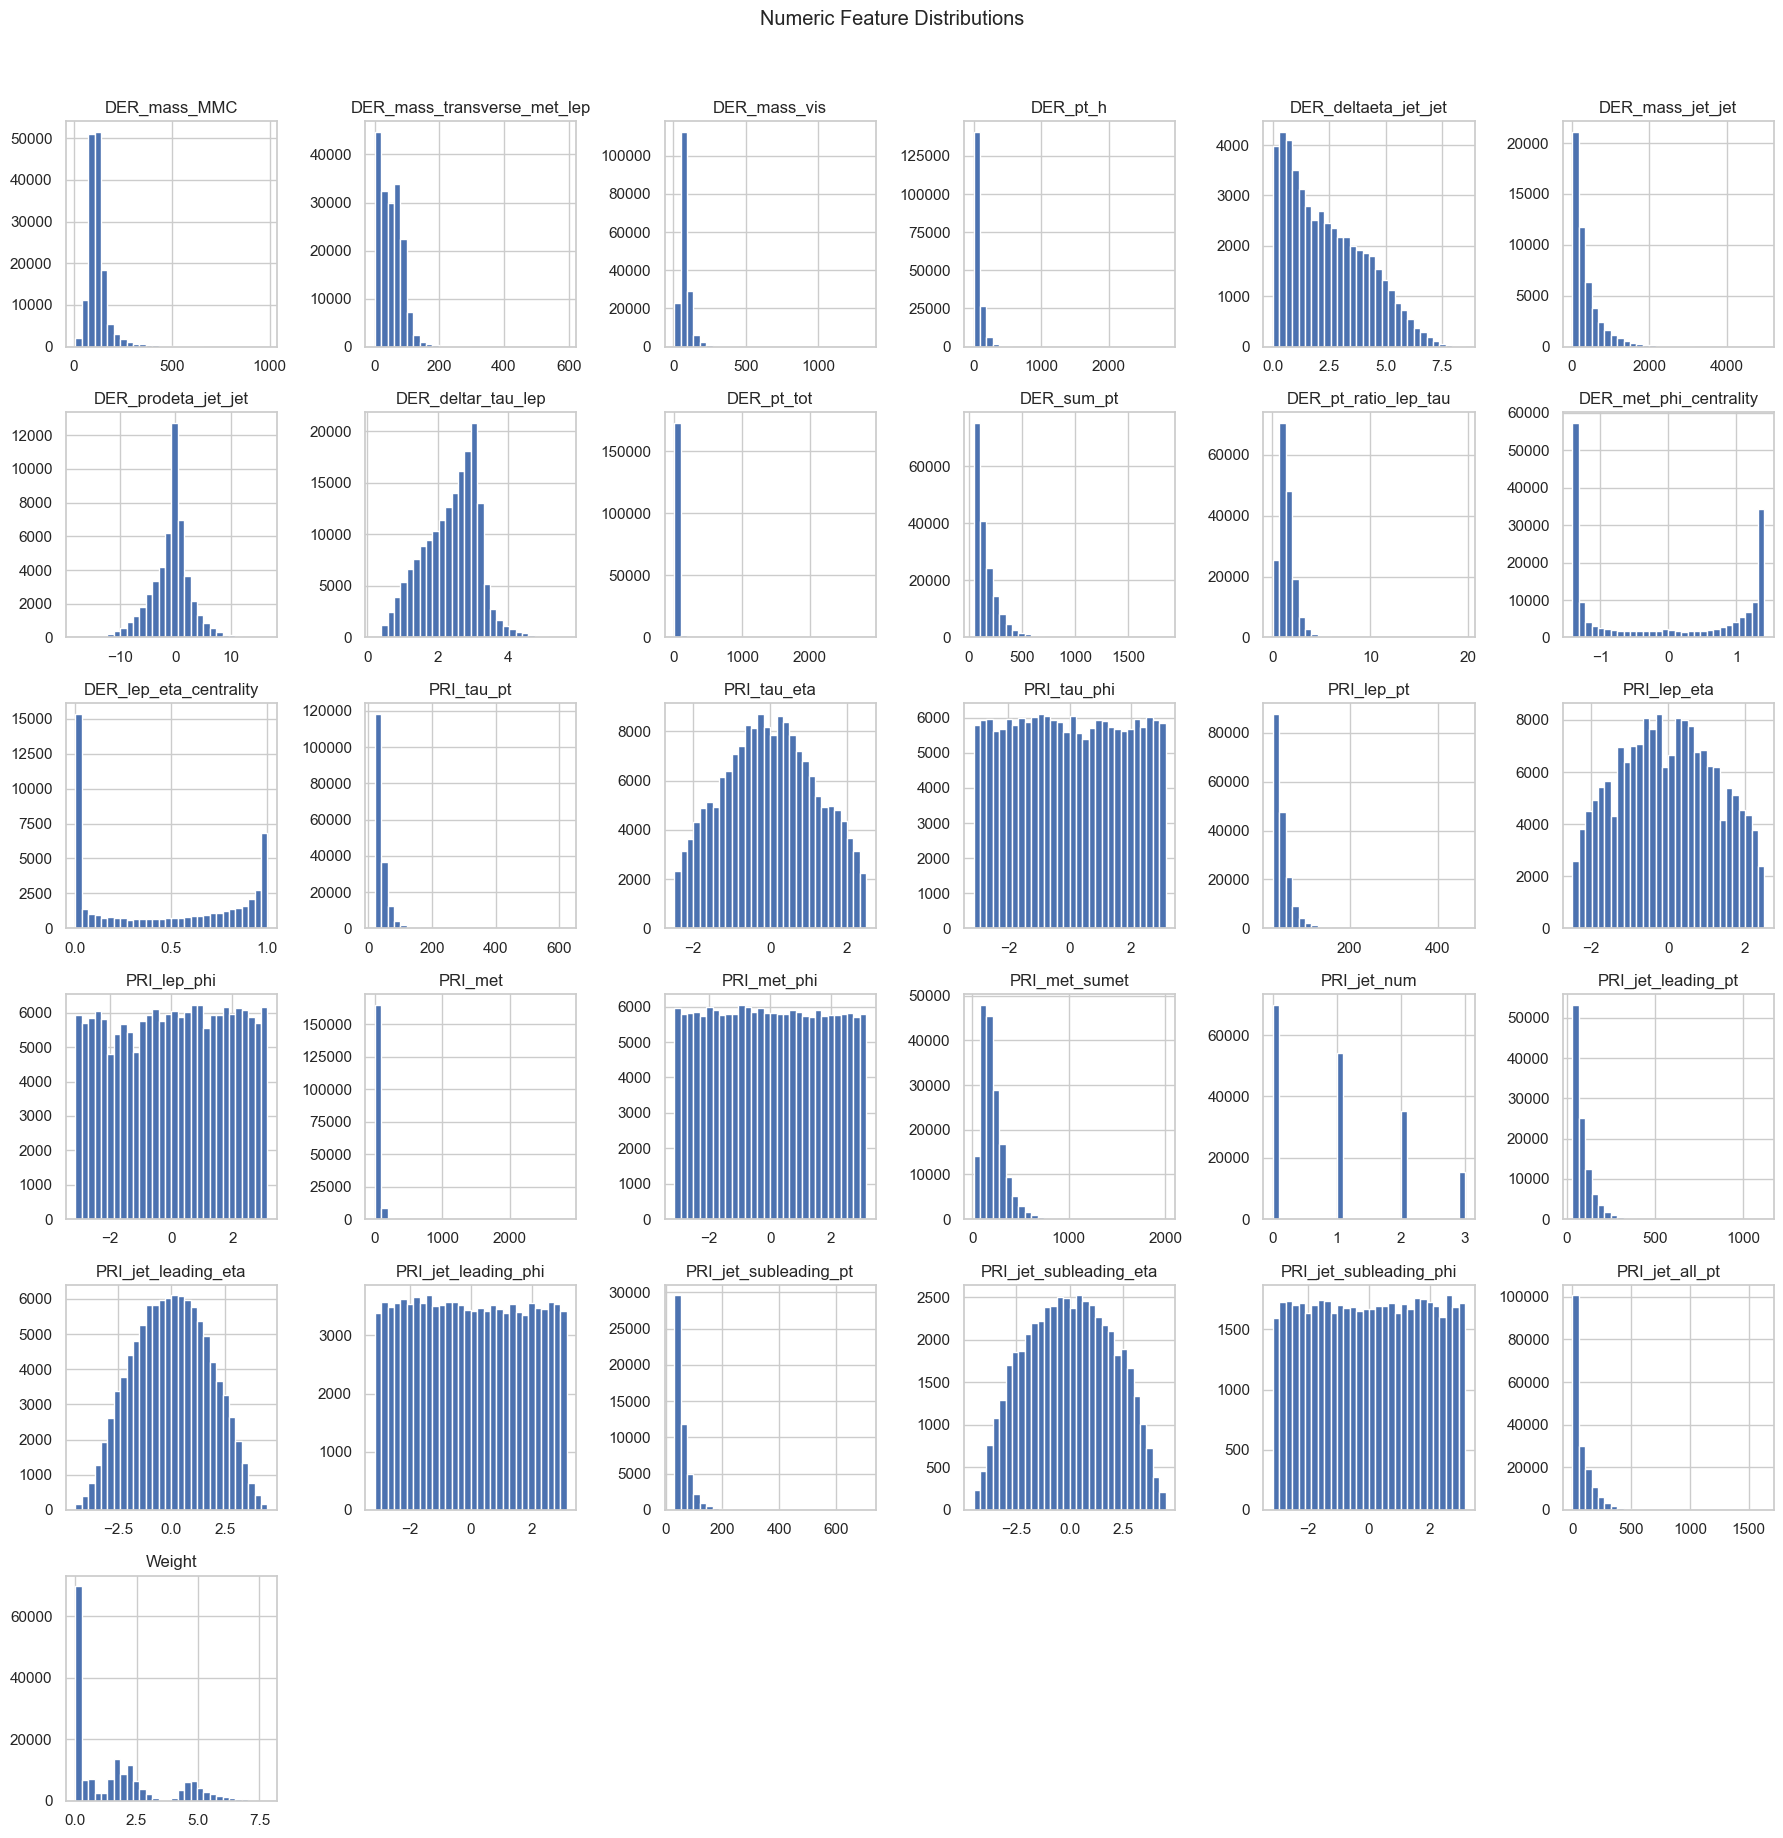

In [9]:
# Step 5 - Numerical Feature Distributions
num_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c != 'EventId'] 
print(f"Number of numeric columns: {len(num_cols)}")

df_train[num_cols].hist(bins=30, figsize=(18, 18))
plt.suptitle("Numeric Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()

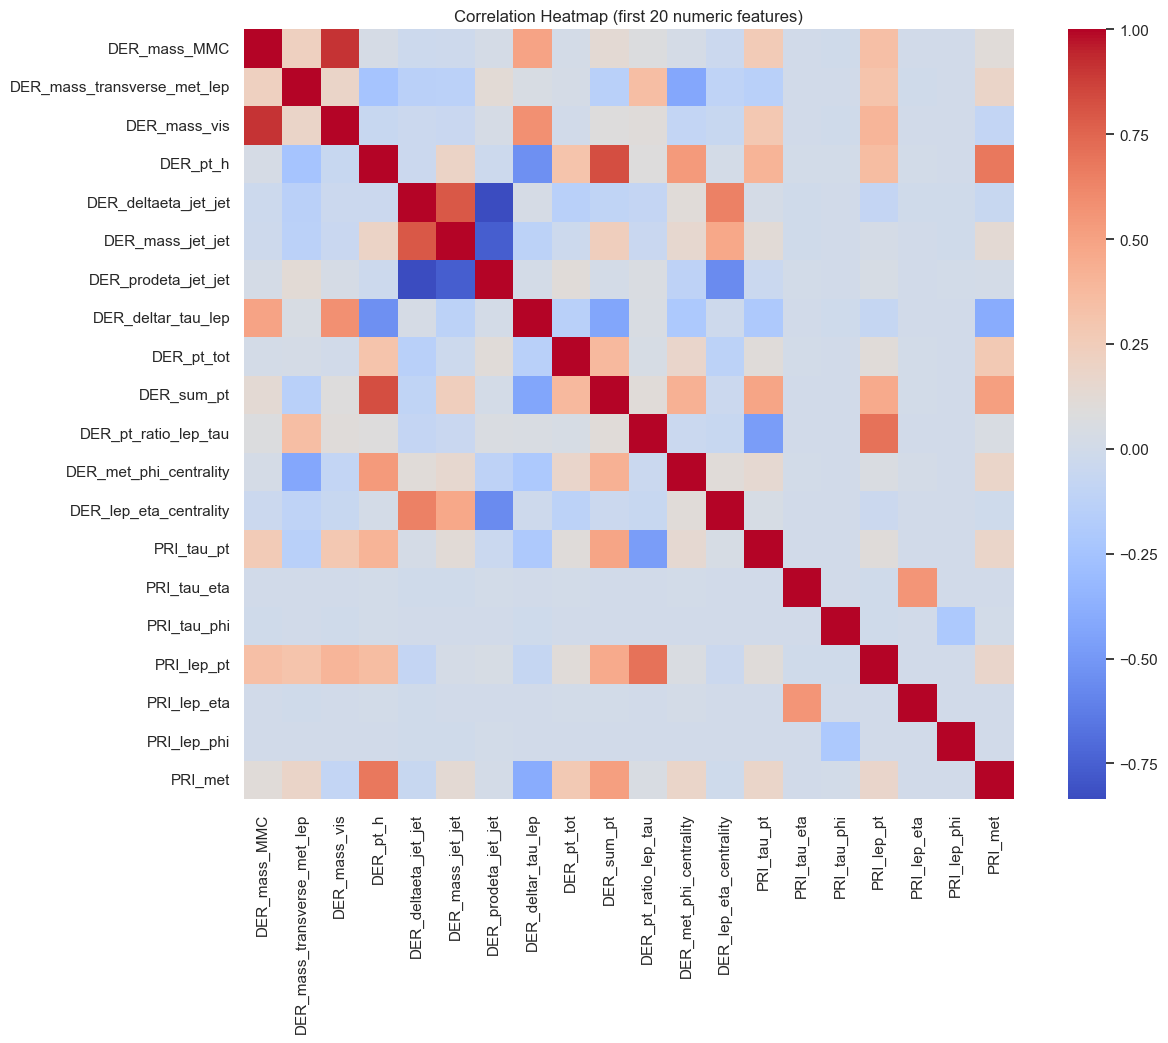

In [10]:
# Step 6 - Correlation Heatmap
corr_matrix = df_train[num_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix.iloc[:20, :20],
    cmap="coolwarm",
    annot=False,
    square=True
)
plt.title("Correlation Heatmap (first 20 numeric features)")
plt.show()

## EDA Summary — HIGGS Dataset
1. **Data Types & Structure**

The dataset contains 32 continuous numerical features, 1 integer ID column, and 1 categorical target label.

All features are real‐valued physical measurements derived from particle collision events.

No categorical or one-hot features are present.

Several derived physics features use a placeholder value –999 to represent missing or undefined measurements.

2. **Missing Values**

A subset of physics-based derived variables contains many –999 entries, often corresponding to cases where the computed quantity is not physically defined.

Columns such as jet-related or mass-related features can have up to 70% missing values.

These were correctly converted to NaN, enabling proper statistical handling during preprocessing.

3. **Feature Distributions**

Many physical quantities (e.g., DER_mass_MMC, DER_pt_h, DER_sum_pt) show strong right-skewed or long-tailed distributions, typical for high-energy physics data.

Angle-related variables (phi, eta) generally display uniform, symmetric, or multi-modal patterns.

Some features (e.g., PRI_jet_num) are discrete with only a few possible values.

Overall, the dataset displays a wide variety of distribution shapes, reflecting different underlying physical processes.

4. **Correlation Structure**

Most pairwise correlations are low (|corr| < 0.3), indicating that the majority of features are relatively independent.

Moderate to strong correlations appear mainly within specific physics groups, such as:

    Mass-related features (DER_mass_MMC, DER_mass_vis, etc.)

    Jet-related features (leading/subleading jet measurements)

Angle-based features (phi/eta) exhibit near-zero correlation with most other variables.

No severe multicollinearity is present; dimensionality reduction (PCA) is not required.

5. **Target Variable**

The target label includes two classes:

    b = background

    s = signal

The class distribution is imbalanced:

    background: 115,214

    signal: 59,786

Roughly 2:1 imbalance, which may require class weighting or sampling techniques.

6. **Modeling Implications**

Tree-based models (XGBoost, LightGBM) are highly suitable:

    Handle skewed distributions well

    Robust to weakly correlated features

    Can capture non-linear interactions typical in physics data

Missingness (especially NaN created from –999) can be exploited by tree models.

Deep learning approaches (MLP, TabTransformer) are also appropriate due to the continuous nature of the data.

PCA or feature reduction is not recommended as correlation is generally low and features carry distinct physical meaning.